# Projet Notations de films 

Introduction, expliquer le contexte, démarche, objectif, etc ..................................

Etudier les différents facteurs qui peuvent expliquer ou influencer les notes des spectateurs attribués à des films.


  

Le rapport se décompose de la manière suivante :   

I - Création de la base de données

1) Webscrapping du site Allocine



II - Analyses descriptive des données

1) 


2)


3) 


III - 

### importation des librairies et fichiers

In [1]:
# Comment les inclure ? Faire condition pour voir si déjà installé ?
!pip install ipywidgets
!pip install jupyterlab_widgets
!jupyter nbextension enable --py widgetsnbextension
!pip install lxml
!pip install aiohttp
!pip install nest_asyncio

import asyncio
import aiohttp
import pandas as pd
from bs4 import BeautifulSoup
import re
import nest_asyncio


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [2]:
# Importation des librairies

# import seaborn as sns #pas besoin si utilise fonctions
import matplotlib.pyplot as plt

# Regression
import statsmodels.api as sm
from statsmodels.formula.api import rlm 

In [3]:
import os

# Importation des fichiers python (contenant des fonctions) crées dans le cadre des 3 parties du projet :

for f in os.listdir('A_Base_de_données'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from A_Base_de_données.{module_name} import *")


for f in os.listdir('B_Analyse_descriptive'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from B_Analyse_descriptive.{module_name} import *")


for f in os.listdir('C_Modele'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from C_Modele.{module_name} import *")


## I - Création de la base de données

### Webscrapping AlloCiné

In [4]:
# Récupération d'une liste de films qui possèdent tous une note moyenne de spectateur et une note moyenn de presse entre l'année .... et l'année .....
base_films = get_base_films(2010, 2012)


# Récupération pour chaque film de différentes caractériques
nest_asyncio.apply()
base_films_enrichie = get_carac_film(base_films)


nombre de films récupérés :  485
nombre de films récupérés :  517
nombre de films récupérés :  518


In [5]:
base_films_enrichie.head()

,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,genre3,...,date_sortie_bluray,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa
0,Rien à déclarer,173528,26 janvier 2011,1h 48min,Dany Boon,"2,4","2,2",Comédie,,,...,15/06/2011,15/06/2011,Long métrage,-,"Flamand, Français",-,Couleur,-,-,125668
1,Les petits mouchoirs,146632,20 octobre 2010,2h 34min,Guillaume Canet,"3,6","2,9",Comédie dramatique,,,...,23/02/2011,01/03/2016,Long métrage,17 000 000 EUR,Français,-,Couleur,-,-,121 898
2,L'Agence tous risques,133588,16 juin 2010,1h 54min,Joe Carnahan,"3,2","3,2",Action,Comédie,,...,03/11/2010,01/06/2015,Long métrage,110 000 000 USD,"Anglais, Français, Espagnol, Swahili",-,Couleur,-,-,-
3,Shutter Island,132039,24 février 2010,2h 17min,Martin Scorsese,"4,4","3,8",Thriller,,,...,24/06/2010,15/10/2017,Long métrage,80 000 000 USD,"Anglais, Allemand",-,Couleur,-,-,124145
4,Incendies,179349,12 janvier 2011,2h 03min,Denis Villeneuve,"4,3","3,8",Drame,,,...,-,12/05/2011,Long métrage,-,"ARABIC, Français",-,Couleur,-,-,128172


In [ ]:
# Exportation en CSV => mettre en commentaire lors du rendu afin que cela soit toujours le même CSV qui soit utilisé par la suite




,types
genre_ind,aucun
titre,aucun
identifiant,aucun
date,aucun
durée,aucun
auteur,aucun
spectateur,aucun
presse,aucun
genre1,aucun
genre2,aucun


### Traitement, Ajout et création de variables

In [ ]:
# Lecture du CSV


In [6]:
# Ajout du genre des réalisateurs
table_avec_genre = get_genre_individuel(base_films_enrichie, 'auteur')

# Aperçu du nb de réalisateurs m vs f
table_avec_genre['genre_ind'].value_counts()


genre_ind
m      911
f      158
m,f     40
f,m     14
Name: count, dtype: int64

In [7]:
table_avec_genre.head()

,genre_ind,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,...,date_sortie_bluray,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa
0,m,4h44 Dernier jour sur terre,193915,19 décembre 2012,1h 22min,Abel Ferrara,"2,2","3,3",Drame,Science Fiction,...,-,19/04/2013,Long métrage,-,Anglais,-,Couleur,-,-,135264
1,m,Very Bad Cops,144195,27 octobre 2010,1h 47min,Adam McKay,"2,5","3,3",Action,Comédie,...,-,01/01/2015,Long métrage,100 000 000 USD,Anglais,-,Couleur,-,-,126348
2,m,You're Next,192301,4 septembre 2013,1h 35min,Adam Wingard,"3,0","3,3",Epouvante-horreur,,...,-,01/02/2016,Long métrage,-,Anglais,-,Couleur,-,-,137250
3,m,Rock Forever,141538,11 juillet 2012,2h 02min,Adam Shankman,"2,9","2,5",Comédie dramatique,Comédie musicale,...,14/11/2012,14/11/2012,Long métrage,70 000 000 USD,Anglais,-,Couleur,-,-,133577
4,m,Gimme the Loot,203507,2 janvier 2013,1h 21min,Adam Leon,"2,9","3,6",Drame,,...,-,02/05/2013,Long métrage,-,Anglais,-,Couleur,-,-,-


In [8]:
# traitement du formalisme des visas
table_avec_genre['num_visa'] = table_avec_genre['num_visa'].str.replace(' ', '')


In [9]:
# Transformation des types de films en variables dummy 
dummies1 = pd.get_dummies(table_avec_genre['genre1'], prefix='genre')
dummies2 = pd.get_dummies(table_avec_genre['genre2'], prefix='genre')
dummies3 = pd.get_dummies(table_avec_genre['genre3'], prefix='genre')

dummies1 = dummies1.astype(int)
dummies2 = dummies2.astype(int)
dummies3 = dummies3.astype(int)

dummies_sum = dummies1.add(dummies2, fill_value=0).add(dummies3, fill_value=0)
dummies_sum = dummies_sum.drop(columns=['genre_'])

df = pd.concat([table_avec_genre, dummies_sum], axis=1)
print('nombre de films pris en compte :', len(df))

nombre de films pris en compte : 1123


In [10]:
# Conversion des notes en décimale
table_avec_genre['spectateur'] = table_avec_genre['spectateur'].apply(mise_en_forme_decimale)
table_avec_genre['presse'] = table_avec_genre['presse'].apply(mise_en_forme_decimale)

In [11]:
# Création variable : différence de notation entre spectateur et presse
table_avec_genre['diff_notation'] = table_avec_genre['spectateur']-table_avec_genre['presse']
table_avec_genre.head()


,genre_ind,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,...,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa,diff_notation
0,m,4h44 Dernier jour sur terre,193915,19 décembre 2012,1h 22min,Abel Ferrara,2.2,3.3,Drame,Science Fiction,...,19/04/2013,Long métrage,-,Anglais,-,Couleur,-,-,135264,-1.1
1,m,Very Bad Cops,144195,27 octobre 2010,1h 47min,Adam McKay,2.5,3.3,Action,Comédie,...,01/01/2015,Long métrage,100 000 000 USD,Anglais,-,Couleur,-,-,126348,-0.8
2,m,You're Next,192301,4 septembre 2013,1h 35min,Adam Wingard,3.0,3.3,Epouvante-horreur,,...,01/02/2016,Long métrage,-,Anglais,-,Couleur,-,-,137250,-0.3
3,m,Rock Forever,141538,11 juillet 2012,2h 02min,Adam Shankman,2.9,2.5,Comédie dramatique,Comédie musicale,...,14/11/2012,Long métrage,70 000 000 USD,Anglais,-,Couleur,-,-,133577,0.4
4,m,Gimme the Loot,203507,2 janvier 2013,1h 21min,Adam Leon,2.9,3.6,Drame,,...,02/05/2013,Long métrage,-,Anglais,-,Couleur,-,-,-,-0.7


In [12]:
# récuparation de l'année
table_avec_genre = get_annee(table_avec_genre, 'date')

In [13]:
# Conversion de la durée en minutes
table_avec_genre['durée'] = table_avec_genre['durée'].astype('string')
table_avec_genre['duree_min'] = table_avec_genre['durée'].apply(duree_en_minutes)

## II -  Analyse descriptive

 QUELS AXES CHOISIR ? 
 - Analyse générales 
 - différence presse vs spec 
 - genre du réalisateur et budget alloué 
 - .....
  

### Généralités

In [ ]:

def histogramme_genre_film(dataframe, genre1, genre2):
    """
    Génération d'un histogramme des notes des spectateurs par GENRE1 et GENRE2 de films

    """
    dataframe = dataframe.rename(columns={'genre1': 'genre'})

    if genre1 != 'Tous':

        if genre2 != ' ':
            dataframe = dataframe[dataframe['genre'].isin([genre1, genre2])]
            titre = f'Notes moyennes des spectateurs pour les films {genre1} et {genre2}'

        else:
            dataframe = dataframe.loc[dataframe['genre'] == genre1]
            titre = f'Notes moyenne des spectateurs pour les films {genre1}'
            
    else:
        titre = 'Notes moyennes des spectateurs par type de film'


    plt.figure(figsize=(8, 6))

    sns.histplot(data=dataframe, x='spectateur', hue='genre', bins=10, kde=True)
    plt.title(titre)
    plt.xlabel('Notes des spectateurs')
    plt.ylabel('Occurences')
    plt.xlim(0, 5)



    if genre1 != 'Tous' and genre2 != ' ' and genre1 != genre2:
        nb_films_1 = len(dataframe.loc[dataframe['genre'] == genre1])
        moyenne_1 = dataframe.loc[dataframe['genre'] == genre1]['spectateur'].mean()

        nb_films_2 = len(dataframe.loc[dataframe['genre'] == genre2])
        moyenne_2 = dataframe.loc[dataframe['genre'] == genre2]['spectateur'].mean()
        
        # ANOVA
        model = ols('spectateur ~ C(genre)', data=dataframe).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        pvalue = anova_table['PR(>F)']['C(genre1)']
        

        plt.text(0.95, 0.75, f'Nombre de films {genre1} : {nb_films_1}', transform=plt.gcf().transFigure, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        plt.figtext(0.95, 0.70, f'Note moyenne: {moyenne_1:.2f}', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

        plt.text(0.95, 0.60, f'Nombre de films {genre2} : {nb_films_2}', transform=plt.gcf().transFigure, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        plt.figtext(0.95, 0.55, f'Note moyenne: {moyenne_2:.2f}', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

        plt.figtext(0.95, 0.50, f'test ANOVA: {pvalue:.2f}', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))
 
           

    else:
        nb_films = len(dataframe)
        moyenne = dataframe['spectateur'].mean()
        plt.text(0.95, 0.75, f'Nombre de films : {nb_films}', transform=plt.gcf().transFigure, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        plt.figtext(0.95, 0.70, f'Note moyenne: {moyenne:.2f}', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))




Dropdown(description='Genre 1 :', index=5, options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Avent…

Dropdown(description='Genre 2 :', index=10, options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Aven…

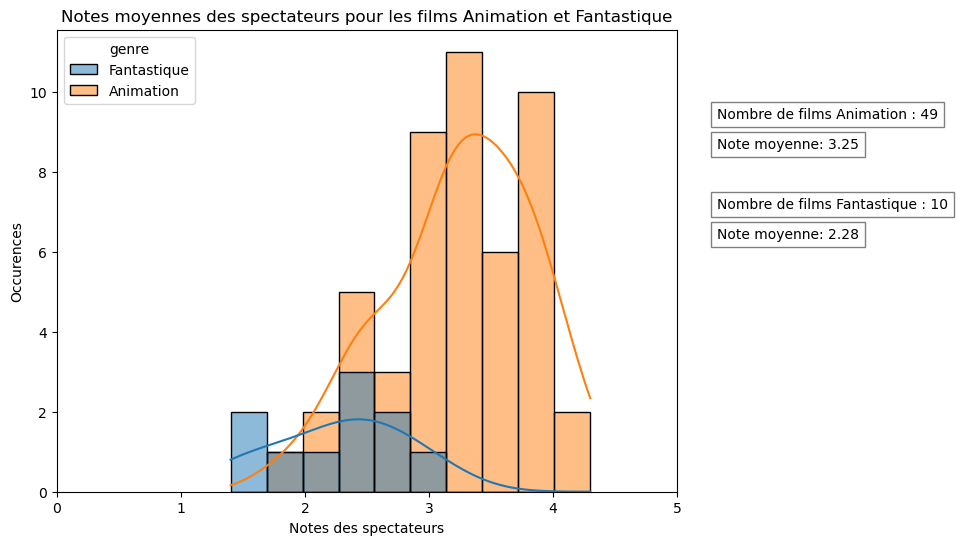

In [ ]:
graphique_genre_film(table_avec_genre)  

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
# ANOVA
model = ols('spectateur ~ C(genre1)', data=table_avec_genre).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table['PR(>F)']['C(genre1)']

np.float64(7.440018523850802e-17)

Avec une p-value de ...... on voit qu'il y a des différences significatives dans la moyenne des notes en fonction du type de film.

In [18]:
dataframe = table_avec_genre[table_avec_genre['genre1'].isin(['Action', 'Fantastique'])]
model = ols('spectateur ~ C(genre1)', data=dataframe).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(genre1),4.784742,1.0,11.071153,0.001172
Residual,50.565174,117.0,NaN,NaN


### Notations spectateurs et presse

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def get_degre_optimal(X, Y, degre_max=6, cv=5):
    """
    Retourne le degré optimal du polynôme de la régression (teste de 1 à 5 degrés par défaut)
    par cross validation (par défaut à 5)

    X : variable en abscisse
    Y : variable en ordonnée
    degre_max : degré maximal testé des polynômes
    cv : nb de folds pour la validation croisée
    """
    # Stockage des MSE
    liste_mse = []

    # Boucle sur chaque degré testé
    for degree in range(1, degre_max + 1):
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()

        # Validation croisée pour estimer la MSE
        mse = -cross_val_score(model, X_poly, Y, cv=cv, scoring='neg_mean_squared_error').mean()
        liste_mse.append(mse)
        print(f"Degree {degree}: MSE = {mse}")

    # Récupération du degré associé à la plus faible MSE
    degre_opt = np.argmin(liste_mse) + 1
    print(f"Degré optimal trouvé : {degre_opt}")

    return degre_opt


Degree 1: MSE = 0.35897772013871687
Degree 2: MSE = 0.3640982347854678
Degree 3: MSE = 0.3699909610827487
Degree 4: MSE = 0.3724317925152655
Degree 5: MSE = 0.36947268585018656
Degree 6: MSE = 0.3746592872334315
Degré optimal trouvé : 1
1


(0.0, 5.0)

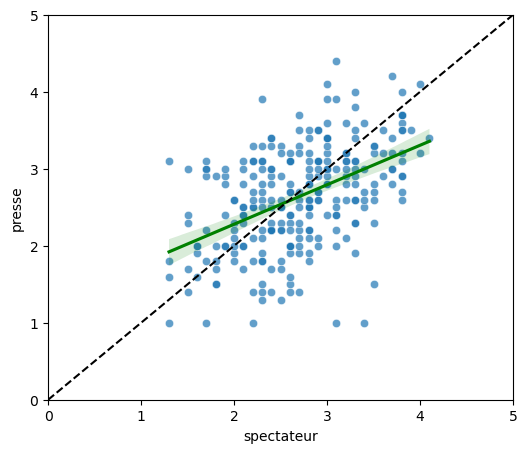

In [43]:
# On pourrait affiner en fonction de la typologie de la presse définie par exemple


dataframe = table_avec_genre[table_avec_genre['genre1']=='Comédie']
# dataframe = table_avec_genre
# nuage de point
plt.figure(figsize=(6, 5))
sns.scatterplot(data=dataframe, x='spectateur', y='presse', alpha=0.7, linewidth=0.5, legend = False)

# Ajout de la regression
degre_optimal = get_degre_optimal(dataframe[['spectateur']], dataframe[['presse']])
sns.regplot(data=dataframe, x='spectateur', y='presse', scatter=False, color='green', order=degre_optimal)

print(degre_optimal)
plt.plot([0, 5], [0, 5], 'k--', label='x = y') 
plt.xlim(0, 5)
plt.ylim(0, 5)


### Genre du réalisateur et budget des films

In [44]:
graphique_h_f(table_avec_genre)

NameError: name 'widgets' is not defined

## Test de modèles sur la différence de notation

### ANOVA (sur premier genre)

### Regression

- Notes spectateurs

In [ ]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['spectateur']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             spectateur   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.22e-19
Time:                        19:22:41   Log-Likelihood:                -256.63
No. Observations:                 296   AIC:                             531.3
Df Residuals:                     287   BIC:                             564.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.71

- Notes presse

In [ ]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['presse']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 presse   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     17.38
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           4.49e-21
Time:                        19:23:34   Log-Likelihood:                -216.55
No. Observations:                 296   AIC:                             451.1
Df Residuals:                     287   BIC:                             484.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.29

- Différences de notations

In [ ]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['diff_notation']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          diff_notation   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.929
Date:                Sun, 03 Nov 2024   Prob (F-statistic):             0.0556
Time:                        19:25:00   Log-Likelihood:                -226.63
No. Observations:                 296   AIC:                             471.3
Df Residuals:                     287   BIC:                             504.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.57

In [ ]:
# test robuste à l'hétéroscédasticité ?
model = rlm("diff_notation ~ duree_min + genre_Action + genre_Animation+genre_Policier+genre_Fantastique+genre_Drame+genre_Aventure", data=df).fit()
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          diff_notation   No. Observations:                  296
Model:                            RLM   Df Residuals:                      288
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Nov 2024                                         
Time:                        19:25:14                                         
No. Iterations:                    16                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5961      0.18